# Question 1: 
## For the "Median value of owner-occupied homes" provide a boxplot

The plot shows how distributed is the variable MEDV


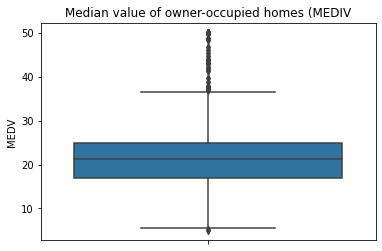

In [7]:
import pandas as pd
import seaborn as sns
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
#print(boston_df.info())

boxplot=sns.boxplot(y='MEDV',data=boston_df)
boxplot.set_title('Median value of owner-occupied homes (MEDIV')
print('The plot shows how distributed is the variable MEDV')

# Question 2: 
## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Count of homes near Charles River (CHAS')

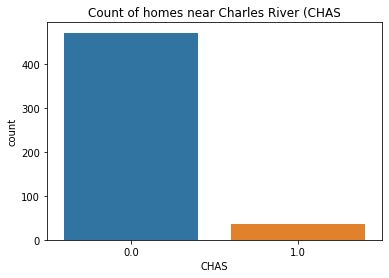

In [8]:
barplot=sns.countplot(x='CHAS',data=boston_df)
barplot.set_title('Count of homes near Charles River (CHAS')
print('The plot shows that there are less homes near Charles River')

In [16]:
groupped_df=boston_df.groupby('CHAS').count()
print(groupped_df)
print('There are 471 values 0 for the variable CHAS and 35 values of 1')

      Unnamed: 0  CRIM   ZN  INDUS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO  \
CHAS                                                                        
0.0          471   471  471    471  471  471  471  471  471  471      471   
1.0           35    35   35     35   35   35   35   35   35   35       35   

      LSTAT  MEDV  
CHAS               
0.0     471   471  
1.0      35    35  
There are 471 values 0 for the variable CHAS and 35 values of 1


# Question 3: 
## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)




 The graph shows how distributed the group of ages are in the sample


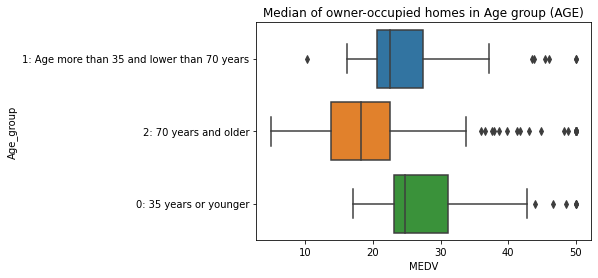

In [59]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '0: 35 years or younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_group'] = '1: Age more than 35 and lower than 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '2: 70 years and older'
graph3 = sns.boxplot(x = 'MEDV', y = 'Age_group', data = boston_df)
graph3.set_title('Median of owner-occupied homes in Age group (AGE)')
print('\n'*3,'The graph shows how distributed the group of ages are in the sample')

# Question 4:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?




 It seems to be less Nitric oxide concentrations as there is less proportion of non-retail business acres per town.
 There could be positive a correlation between these 2 variables


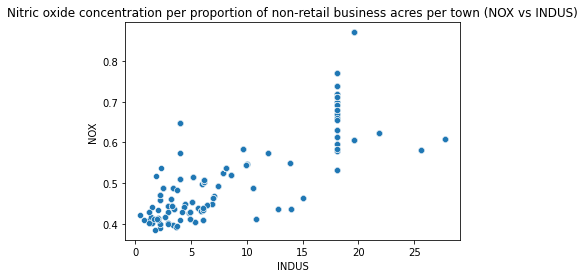

In [60]:
graph4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
graph4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town (NOX vs INDUS)')
print('\n'*3,'It seems to be less Nitric oxide concentrations as there is less proportion of non-retail business acres per town.\n There could be positive a correlation between these 2 variables')

# Question 5:
## Create a histogram for the pupil to teacher ratio variable

AttributeError: AttributeError: module 'matplotlib' has no attribute 'show'

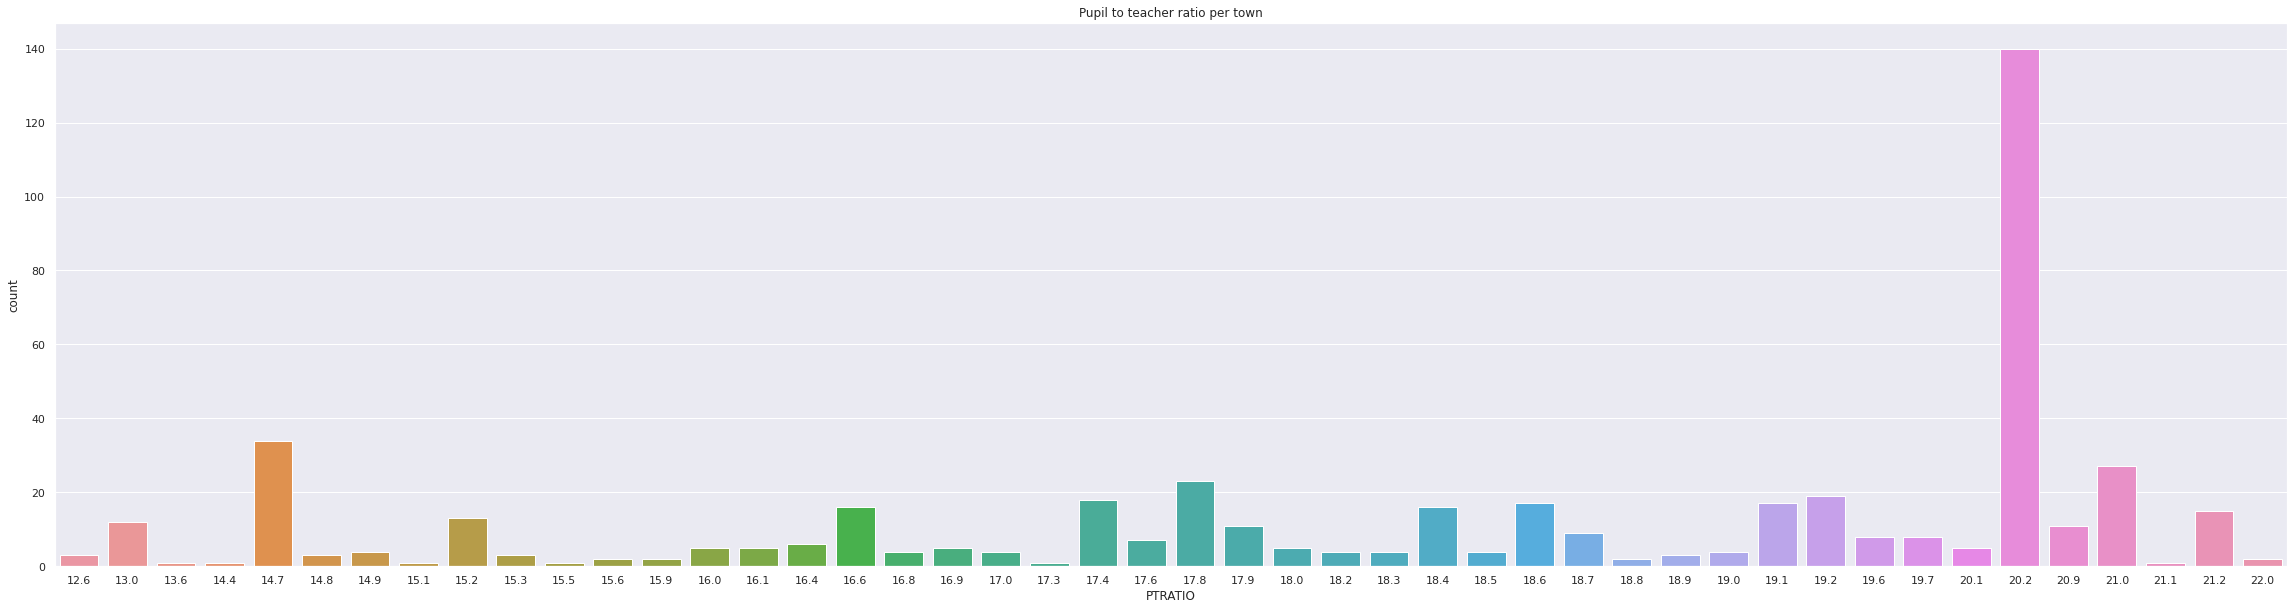

In [62]:
import seaborn as sns2
import matplotlib as plt
graph5 = sns2.countplot(x = 'PTRATIO', data = boston_df)
sns2.set(rc={'figure.figsize':(40,10)})
#sns.set(font_scale=1)
graph5.set_title('Pupil to teacher ratio per town')

plt.show()
print('\n The plot shows the amount of PTRATIO in the sample, with the highest value in 20.2 PTRATIO with 140 values \n the second highest value has less than 40')

# Task5, Q1:
## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
### Notes:
State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [64]:
import scipy.stats
#NULL HYPOTESIS -> There is no significant difference in median value between houses bounded and not bounded by the Charles River
#ALT HYPOTESIS  -> Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles River
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
test=scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)
print(test)
print('As the p-value is less than 0.05, we reject the Null Hypothesis, \n meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away')

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)
As the p-value is less than 0.05, we reject the Null Hypothesis, 
 meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away


In [65]:
print('Question 1: There is no statistical difference in median value betwenn houses near the Charles River and houses far away')

Question 1: There is no statistical difference in median value betwenn houses near the Charles River and houses far away


# Task 5, Q2:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [67]:
import statsmodels.api as sm
#NULL HYPOTESIS: There is not a statistical difference in the median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
#ALTERNATIVE HYPOTESIS: There is a statistical difference in the median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
anova = sm.stats.anova_lm(lm)
print(anova)
print('As p-value is less than 0.05, we fail to accept the Null Hypothesis. \nWe conclude that there is statistical difference in Median values of houses (MEDV) \nfor each proportion of owner occpied units built prior to 1940')

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN
As p-value is less than 0.05, we fail to accept the Null Hypothesis. 
We conclude that there is statistical difference in Median values of houses (MEDV) 
for each proportion of owner occpied units built prior to 1940


In [68]:
print('Question 8: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940')

Question 8: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940


# Task 5, Q4:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [76]:
#NULL HYPOTESIS: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

#ALTERNATIVE HYPOTESIS: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)

In [77]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

OLS Regression Results 
 
 Dep. Variable: MEDV R-squared: 0.062 
 
 
 Model: OLS Adj. R-squared: 0.061 
 
 
 Method: Least Squares F-statistic: 33.58 
 
 
 Date: Tue, 14 Nov 2023 Prob (F-statistic): 1.21e-08 
 
 
 Time: 01:50:58 Log-Likelihood: -1823.9 
 
 
 No. Observations: 506 AIC: 3652. 
 
 
 Df Residuals: 504 BIC: 3660. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 18.3901 0.817 22.499 0.000 16.784 19.996 
 
 
 DIS 1.0916 0.188 5.795 0.000 0.722 1.462 
 
 
 
 
 Omnibus: 139.779 Durbin-Watson: 0.570 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 305.104 
 
 
 Skew: 1.466 Prob(JB): 5.59e-67 
 
 
 Kurtosis: 5.424 Cond. No. 9.32 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [78]:
print('Question 4: The coef DIS is 1.0916, meaning that adding weighted distance to the 5 employment centers in boston, would increase 1.0916 the median value of owner occupied homes')

Question 4: The coef DIS is 1.0916, meaning that adding weighted distance to the 5 employment centers in boston, would increase 1.0916 the median value of owner occupied homes
